# RL interface

## Goal:

- Familiarize yourself with the programming interface

In [15]:
%cd chula_rl

/content/chula_rl


In [0]:
!pip install -e .

In [0]:
import gym
import chula_rl as rl
import os
import numpy as np
import random
from collections import deque, defaultdict

In [0]:
def make_env():
    # define the environment here we use Gridworld
    env = rl.env.Gridworld(shape=(4, 3),
                           start=(2, 0),
                           goal=(1, 2),
                           move_reward=-1)
    env = rl.env.wrapper.ClipEpisodeLength(env, n_max_length=10)
    env = rl.env.wrapper.EpisodeSummary(env)
    return env

## Here is our gridword environment

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: <class 'chula_rl.env.wrapper.ep_summary.EpisodeSummary'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Map: -1 = trap, 1 = goal, 2 = current


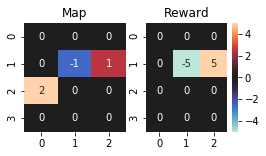

In [20]:
env = make_env()
env.reset()
env.render()
print('Map: -1 = trap, 1 = goal, 2 = current')

You start at (2, 0) the goal is at (1, 2) where exists the reward of 5. 

There is no penalty of hitting the wall, you'll just bounce off it.

### Possible actions:

In [21]:
print('kind of action space:', env.action_space)
print('number of possible actions:', env.action_space.n)

kind of action space: Discrete(4)
number of possible actions: 4


You just select a number 0-3 then.

Here:
- 0 = up
- 1 = left
- 2 = down
- 3 = right

## Running in the environment

current state: [2 0]
current state: [1 0] | reward: -1 | is done: False
current state: [0 0] | reward: -1 | is done: False
current state: [0 0] | reward: -1 | is done: False


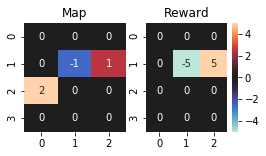

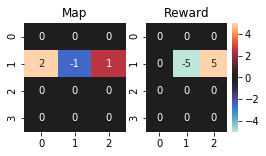

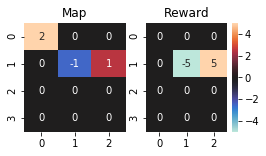

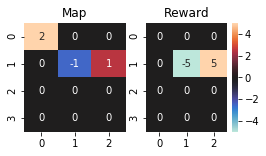

In [22]:
s = env.reset()
env.render()
print('current state:', s)
s, r, done, info = env.step(0) # up
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(0) # up
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(0) # up, you won't move anywhere (but still recieve -1 reward)
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)

Reward -1 for every move is a way to force you to be fast.

*   List item
*   List item



### If we reach a trap we get a negative reward, if we reach a goal we get a positive reward

current state: [2 0]
current state: [2 1] | reward: -1 | is done: False
current state: [1 1] | reward: -6 | is done: False
current state: [1 2] | reward: 4 | is done: True


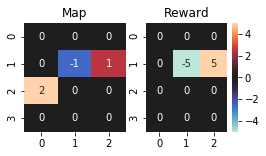

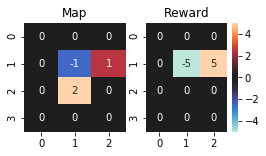

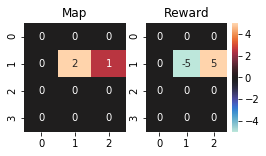

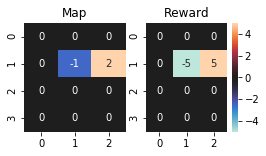

In [23]:
s = env.reset()
env.render()
print('current state:', s)
s, r, done, info = env.step(3) # right
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(0) # up, fallen into the pit (-5 reward)
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(3) # right, reached the goal state, receiving (5 reward)
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)

### An optimal path

current state: [2 0]
current state: [2 1] | reward: -1 | is done: False
current state: [2 2] | reward: -1 | is done: False
current state: [1 2] | reward: 4 | is done: True


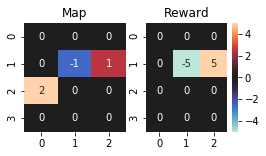

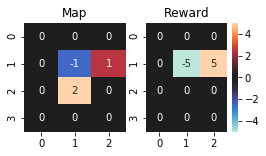

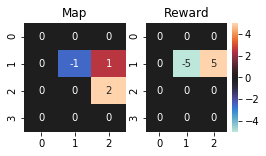

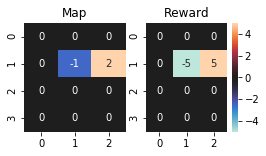

In [24]:
s = env.reset()
env.render()
print('current state:', s)
s, r, done, info = env.step(3) # right
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(3) # right
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)
s, r, done, info = env.step(0) # up, reached the goal state, receiving reward of 5 (also -1)
env.render()
print('current state:', s, '| reward:', r, '| is done:', done)

# Random agent

`action_space` has a `sample()` method for uniform sampling an action.

In [26]:
env.action_space.sample()

3

Run many steps until termination (either reaching the goal, or being clipped)

In [29]:
s = env.reset()
while True:
    a = env.action_space.sample()
    s, r, done, info = env.step(a)
    if done: # episode ends
        print(info) # summary of the episode
        break

{'clipped_length': True, 'episode': {'reward': -10, 'length': 10, 'time': 0.002902}}


# Questions

Create a new cell below each question to type in the answer.

## Q1: Why do we want to clip the episode length?

Prevent loop episode

## Q2: What is an average epsiode length without clipping?
Hint: conduct an experiment to verify.

In [0]:
def make_env():
    # define the environment here we use Gridworld
    env = rl.env.Gridworld(shape=(4, 3),
                           start=(2, 0),
                           goal=(1, 2),
                           move_reward=-1)
#     env = rl.env.wrapper.ClipEpisodeLength(env, n_max_length=10)
    env = rl.env.wrapper.EpisodeSummary(env)
    return env

In [0]:
env = make_env()

In [49]:
length = 0
for i in range(100000):
    s = env.reset()
    while True:
        a = env.action_space.sample()
        s, r, done, info = env.step(a)
        if done: # episode ends
#             print(info) # summary of the episode
            length += info['episode']['length']
            break
            
print(length/100000)

25.29164
